## Descriptive statistics

In [21]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Australian Football League (AFL)

afl_finalists = pd.read_csv('https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/afl_finalists.csv')
afl_margins = pd.read_csv('https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/afl_margins.csv')

In [23]:
afl_finalists.shape, afl_margins.shape

((400, 1), (176, 1))

In [24]:
# The afl_margins variable contains the winning margin (number of points) for all 176 home and away games played during the 2010 season
print(afl_margins)

     afl.margins
0             56
1             31
2             56
3              8
4             32
..           ...
171           28
172           38
173           29
174           10
175           10

[176 rows x 1 columns]


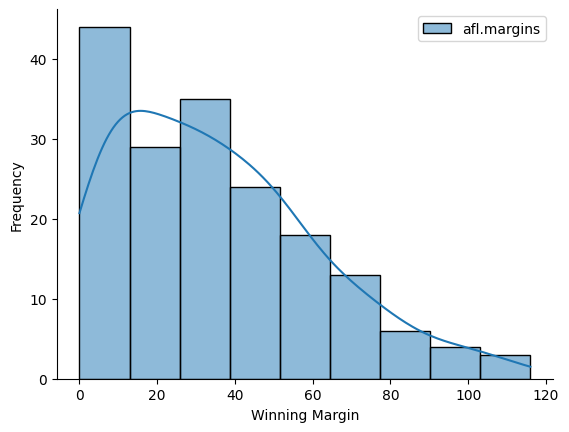

In [25]:
ax = sns.histplot(afl_margins, kde=True, color = 'orange')
ax.set(xlabel="Winning Margin", ylabel="Frequency")
sns.despine()

In [26]:
# The afl_finalists variable contains the names of all 400 teams that played in all 200 finals matches played during the period 1987 to 2010
print(afl_finalists)

        afl.finalists
0            Hawthorn
1           Melbourne
2             Carlton
3           Melbourne
4            Hawthorn
..                ...
395            Sydney
396           Geelong
397  Western Bulldogs
398          St Kilda
399          St Kilda

[400 rows x 1 columns]


## Medidas de tendencia central

###  La media

In [27]:
(56 + 31 + 56 + 8 + 32) / 5

36.6

In [28]:
sum(margins)

NameError: name 'margins' is not defined

In [45]:
margins[0:5]
sum(margins[0:5])/5

36.6

In [44]:
margins = afl_margins['afl.margins']

sum_x = sum(margins)
n = len(margins)
sum_x / n

35.30113636363637

In [20]:
margins.mean() # Means es un método de pandas y np, no una función nativa

NameError: name 'margins' is not defined

In [19]:
# Si trabajamos con objetos fuera de pandas, podemos usar statistics
import statistics

statistics.mean(margins)


NameError: name 'margins' is not defined

In [46]:
statistics.mean(margins)

35.30113636363637

### La mediana

In [12]:
sorted_margins = afl_margins.sort_values(by = 'afl.margins', ascending= True)
sorted_margins[84:92]

,afl.margins
165,29
173,29
150,29
117,30
1,31
4,32
123,32
136,33


In [13]:
print(f'El tamaño de la muestra n es {n}')
print(f'Los valores en la mitad son: \n n/2 = {int(sorted_margins.iloc[n//2 - 1])} \n n/2  + 1 = {int(sorted_margins.iloc[n//2])} ')

median_value = float((sorted_margins.iloc[n//2 - 1] + sorted_margins.iloc[n//2])/2)
print(f'El valor de la mediana es: {median_value}')

NameError: name 'n' is not defined

In [56]:
afl_margins.median()

afl.margins    30.5
dtype: float64

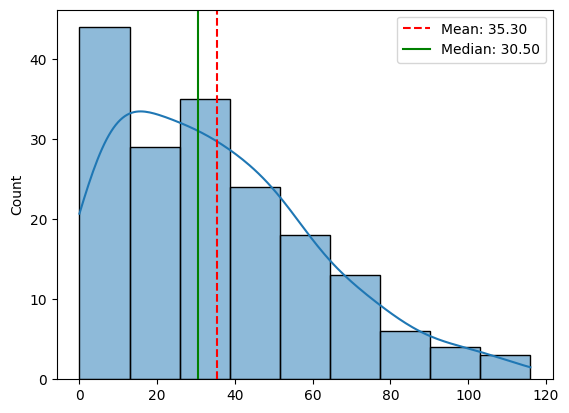

In [14]:
# Crear el histograma
sns.histplot(afl_margins, color='purple', kde=True)

# Calcular la media y la mediana
mean_value = np.mean(afl_margins)
median_value = np.median(afl_margins)

# Dibujar las líneas verticales para la media y la mediana
plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='-', label=f'Median: {median_value:.2f}')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


### Media truncada o recortada (Trimmed mean)

Cuando nos enfrentamos a una situación en la que algunas de las observaciones con valores más extremos podrían no ser del todo fiables, la media no es necesariamente una buena medida de la tendencia central. Es muy sensible a uno o dos valores extremos y, por lo tanto, no se considera una **medida robusta** .

Un remedio que hemos visto es utilizar la mediana. Una solución más general es utilizar una "media recortada". Para calcular una media recortada, lo que se hace es "descartar" los ejemplos más extremos en ambos extremos (es decir, el mayor y el menor) y luego tomar la media de todo lo demás. El objetivo es preservar las mejores características de la media y la mediana: al igual que una mediana, no se está muy influenciado por los valores atípicos extremos, pero al igual que la media, se "utiliza" más de una de las observaciones.

In [15]:
dataset = [-15,2,3,4,5,6,7,8,9,12]
print(f'Mean: {statistics.mean(dataset)}')
print(f'Median: {statistics.median(dataset)}')

from scipy import stats

print(f'Trimmed mean: {stats.trim_mean(dataset, proportiontocut = .1)}')

NameError: name 'statistics' is not defined

### Moda

La moda de una muestra es muy simple: es el valor que ocurre con mayor frecuencia

In [16]:
# Quién ha jugado en mas finales?

afl_finalists.value_counts()

afl.finalists   
Geelong             39
West Coast          38
Essendon            32
Collingwood         28
Melbourne           28
North Melbourne     28
Hawthorn            27
Adelaide            26
Carlton             26
Sydney              26
Brisbane            25
St Kilda            24
Western Bulldogs    24
Port Adelaide       17
Fremantle            6
Richmond             6
Name: count, dtype: int64

In [17]:
statistics.mode(afl_finalists['afl.finalists'])

NameError: name 'statistics' is not defined

### Medidas de variabilidad

La segunda cosa que realmente queremos es una medida de la variabilidad de los datos. Es decir, ¿qué tan "dispersos" están los datos? ¿Qué tan "lejos" de la media o la mediana tienden a estar los valores observados? 

### Rango

El rango de una variable es muy simple: es el valor más grande menos el valor más pequeño. 

In [18]:
margins.min(), margins.max()

NameError: name 'margins' is not defined

### Rango intercuartil 

El rango intercuartil (RIC) es como el rango, pero en lugar de calcular la diferencia entre el valor más grande y el más pequeño, calcula la diferencia entre el cuartil 25 y el cuartil 75. El rango intercuartil es el rango abarcado por la “mitad media” de los datos.

In [89]:
np.quantile(margins, [0.25, .75])

array([12.75, 50.5 ])

In [90]:
stats.iqr(margins) #IQR

37.75

### Desviación absoluta media 

Las dos medidas que hemos analizado hasta ahora, el rango y el rango intercuartil, se basan en la idea de que podemos medir la dispersión de los datos observando los cuantiles de los mismos. Sin embargo, esta no es la única forma de pensar en el problema. 

Un enfoque diferente es seleccionar un punto de referencia significativo (normalmente la media o la mediana) y luego informar las desviaciones "típicas" con respecto a ese punto de referencia. ¿Qué queremos decir con desviación "típica"? ¡Normalmente, el valor medio o mediano de estas desviaciones! En la práctica, esto conduce a dos medidas diferentes, la **"desviación absoluta media (con respecto a la media)"** y la **"desviación absoluta mediana (con respecto a la mediana)".**

$$AAD(X) = \frac{1}{N} \sum_{i = 1}^N |X_i - \bar{X}|$$

In [93]:
X = [56, 31, 56, 8, 32] 
X_bar = np.mean(X)
AD = []

for i in X:
    AD.append(abs(i - X_bar))

AAD = np.mean(AD)
AAD


15.52

In [97]:
data = pd.Series(X) 
data.mad()

AttributeError: 'Series' object has no attribute 'mad'

In [96]:
pip install --upgrade pandas

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.5 MB 4.2 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/11.5 MB 7.7 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.5 MB 9.1 MB/s eta 0:00:01
   -------------------------- ------------- 7.6/11.5 MB 9.8 MB/s eta 0:00:01
   ----------------------------------- ---- 10.2/11.5 MB 10.3 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 9.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.1
    Uninstalling pandas-2.2.1:
      Successfully uninstalled pandas-2.2.1
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mglearn 0.2.0 requires matplotlib, which is not installed.
plotnine 0.13.2 requires matplotlib>=3.6.0, which is not installed.
seaborn 0.13.2 requires matplotlib!=3.6.1,>=3.4, which is not installed.
